<a href="https://colab.research.google.com/github/Neermita18/Kaggle_challenges/blob/main/scRNA_sequencing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np



In [ ]:
pip install scanpy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.4/122.4 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 12.8 MB/s eta 0:00:00
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8026 sha256=cfcbcee037efb70750227686b4fce5cb21a67eeee15fc91e995c889a7607482e
  Stored in directory: /root/.cache/pip/wheels/6a/aa/b9/eb5d4031476ec10802795b97ccf937b9bd998d68a9b268765a
Successfully built session-info


In [3]:
!conda install -y -c anaconda cmake
!pip install scanpy
!pip install leidenalg
!pip install louvain

/bin/bash: line 1: conda: command not found
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.4/122.4 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 8.3 MB/s eta 0:00:00
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8026 sha256=746bd9331fcb8c12b3fec1e1655c12822c2c84350a3711097f8b2173d8e8b533
  Stored in directory: /root/.cache/pip/wheels/6a/aa/b9/eb5d4031476ec10802795b97ccf937b9bd998d68a9b268765a
Successfully built session-info
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 52.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 

In [4]:
import scanpy as sc
import scipy
import os
import scipy.io as sio

In [ ]:
pip install 'scanpy[leiden]'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 76.7 MB/s eta 0:00:00


In [5]:
data_path = '/volume-general/analysis/20201118-novaseq/data/pbmc/'

In [6]:
sc.settings.verbosity = 1 # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=100, fontsize=10, dpi_save=300, figsize=(5,4), format='png')
sc.settings.figdir = '/volume-general/analysis/20201118-novaseq/figures/pbmc/'

In [7]:

adata=sc.datasets.pbmc3k()

  0%|          | 0.00/5.58M [00:00<?, ?B/s]

In [11]:
adata

AnnData object with n_obs × n_vars = 2700 × 32738
    var: 'gene_ids'

In [30]:
import os
import requests
import tarfile
import scanpy as sc


adata = sc.read_10x_mtx("/content/pbmc3k_filtered_gene_bc_matrices/filtered_gene_bc_matrices/hg19", var_names="gene_symbols", cache=True)





FileNotFoundError: Did not find file /content/pbmc3k_filtered_gene_bc_matrices/filtered_gene_bc_matrices/hg19/matrix.mtx.gz.

In [12]:
print(adata.shape)

(2700, 32738)


In [13]:
print(adata.obs.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2700 entries, AAACATACAACCAC-1 to TTTGCATGCCTCAC-1
Empty DataFrame
None


In [14]:
print(adata.var.info())

<class 'pandas.core.frame.DataFrame'>
Index: 32738 entries, MIR1302-10 to AC002321.1
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   gene_ids  32738 non-null  object
dtypes: object(1)
memory usage: 1.5+ MB
None


In [15]:
adata.obs

Empty DataFrame
Columns: []
Index: [AAACATACAACCAC-1, AAACATTGAGCTAC-1, AAACATTGATCAGC-1, AAACCGTGCTTCCG-1, AAACCGTGTATGCG-1, AAACGCACTGGTAC-1, AAACGCTGACCAGT-1, AAACGCTGGTTCTT-1, AAACGCTGTAGCCA-1, AAACGCTGTTTCTG-1, AAACTTGAAAAACG-1, AAACTTGATCCAGA-1, AAAGAGACGAGATA-1, AAAGAGACGCGAGA-1, AAAGAGACGGACTT-1, AAAGAGACGGCATT-1, AAAGATCTGGGCAA-1, AAAGCAGAAGCCAT-1, AAAGCAGATATCGG-1, AAAGCCTGTATGCG-1, AAAGGCCTGTCTAG-1, AAAGTTTGATCACG-1, AAAGTTTGGGGTGA-1, AAAGTTTGTAGAGA-1, AAAGTTTGTAGCGT-1, AAATCAACAATGCC-1, AAATCAACACCAGT-1, AAATCAACCAGGAG-1, AAATCAACCCTATT-1, AAATCAACGGAAGC-1, AAATCAACTCGCAA-1, AAATCATGACCACA-1, AAATCCCTCCACAA-1, AAATCCCTGCTATG-1, AAATGTTGAACGAA-1, AAATGTTGCCACAA-1, AAATGTTGTGGCAT-1, AAATTCGAAGGTTC-1, AAATTCGAATCACG-1, AAATTCGAGCTGAT-1, AAATTCGAGGAGTG-1, AAATTCGATTCTCA-1, AAATTGACACGACT-1, AAATTGACTCGCTC-1, AACAAACTCATTTC-1, AACAAACTTTCGTT-1, AACAATACGACGAG-1, AACACGTGCAGAGG-1, AACACGTGGAAAGT-1, AACACGTGGAACCT-1, AACACGTGGCTACA-1, AACACGTGTACGAC-1, AACAGCACAAGAGT-1, AACATTGATGGGAG-1, AACCAGTGATACCG-1, AACCCAGATCGCTC-1, AACCGATGCTCCCA-1, AACCGATGGTCATG-1, AACCGATGTTCTAC-1, AACCGCCTAGCGTT-1, AACCGCCTCTACGA-1, AACCTACTGTGAGG-1, AACCTACTGTGTTG-1, AACCTTACGAGACG-1, AACCTTACGCGAGA-1, AACCTTACTAACGC-1, AACCTTTGGACGGA-1, AACCTTTGTACGCA-1, AACGCAACAAGTAG-1, AACGCATGACCCAA-1, AACGCATGCCTTCG-1, AACGCATGTACTTC-1, AACGCCCTCGGGAA-1, AACGCCCTCGTACA-1, AACGCCCTGCTTAG-1, AACGCCCTGGCATT-1, AACGTCGAGTATCG-1, AACGTGTGAAAGCA-1, AACGTGTGGCGGAA-1, AACGTGTGTCCAAG-1, AACGTGTGTGCTTT-1, AACTACCTTAGAGA-1, AACTCACTCAAGCT-1, AACTCACTTGGAGG-1, AACTCGGAAAGTGA-1, AACTCGGAAGGTCT-1, AACTCTTGCAGGAG-1, AACTGTCTCCCTTG-1, AACTTGCTACGCTA-1, AACTTGCTGGGACA-1, AAGAACGAGTGTTG-1, AAGAAGACGTAGGG-1, AAGACAGAAGTCTG-1, AAGACAGAGGATCT-1, AAGACAGATTACCT-1, AAGAGATGGGTAGG-1, AAGATGGAAAACAG-1, AAGATGGAGAACTC-1, AAGATGGAGATAAG-1, AAGATTACAACCTG-1, ...]

[2700 rows x 0 columns]

In [16]:
adata.var

gene_ids
index                        
MIR1302-10    ENSG00000243485
FAM138A       ENSG00000237613
OR4F5         ENSG00000186092
RP11-34P13.7  ENSG00000238009
RP11-34P13.8  ENSG00000239945
...                       ...
AC145205.1    ENSG00000215635
BAGE5         ENSG00000268590
CU459201.1    ENSG00000251180
AC002321.2    ENSG00000215616
AC002321.1    ENSG00000215611

[32738 rows x 1 columns]

In [17]:
df=adata.to_df()

In [18]:
df.dtypes

index
MIR1302-10      float32
FAM138A         float32
OR4F5           float32
RP11-34P13.7    float32
RP11-34P13.8    float32
                 ...   
AC145205.1      float32
BAGE5           float32
CU459201.1      float32
AC002321.2      float32
AC002321.1      float32
Length: 32738, dtype: object

In [ ]:
df.value_counts()

MIR1302-10  FAM138A  OR4F5  RP11-34P13.7  RP11-34P13.8  AL627309.1  RP11-34P13.14  RP11-34P13.9  AP006222.2  RP4-669L17.10  OR4F29  RP4-669L17.2  RP5-857K21.15  RP5-857K21.1  RP5-857K21.2  RP5-857K21.3  RP5-857K21.4  RP5-857K21.5  OR4F16  RP11-206L10.3  RP11-206L10.5  RP11-206L10.4  RP11-206L10.2  RP11-206L10.9  AL669831.1  FAM87B  LINC00115  FAM41C  AL645608.2  RP11-54O7.16  RP11-54O7.1  RP11-54O7.2  RP11-54O7.3  SAMD11  AL645608.1  NOC2L  KLHL17  PLEKHN1  C1orf170  RP11-54O7.17  HES4  RP11-54O7.11  ISG15  AGRN  RP11-54O7.18  RNF223  C1orf159  RP11-465B22.5  RP11-465B22.8  TTLL10-AS1  TTLL10  TNFRSF18  TNFRSF4  SDF4  B3GALT6  FAM132A  RP5-902P8.12  UBE2J2  RP5-902P8.10  SCNN1D  ACAP3  PUSL1  CPSF3L  GLTPD1  TAS1R3  DVL1  MXRA8  AURKAIP1  CCNL2  RP4-758J18.2  MRPL20  RP4-758J18.13  ANKRD65  RP4-758J18.7  TMEM88B  RP4-758J18.10  VWA1  ATAD3C  ATAD3B  ATAD3A  TMEM240  SSU72  AL645728.1  C1orf233  RP11-345P4.9  MIB2  MMP23B  CDK11B  RP11-345P4.10  SLC35E2B  RP11-345P4.7  CDK11A  SLC35E2  

In [19]:
df.isna().sum()

index
MIR1302-10      0
FAM138A         0
OR4F5           0
RP11-34P13.7    0
RP11-34P13.8    0
               ..
AC145205.1      0
BAGE5           0
CU459201.1      0
AC002321.2      0
AC002321.1      0
Length: 32738, dtype: int64

### Quality control
- too many genes/transcripts
- too little genes/transcripts

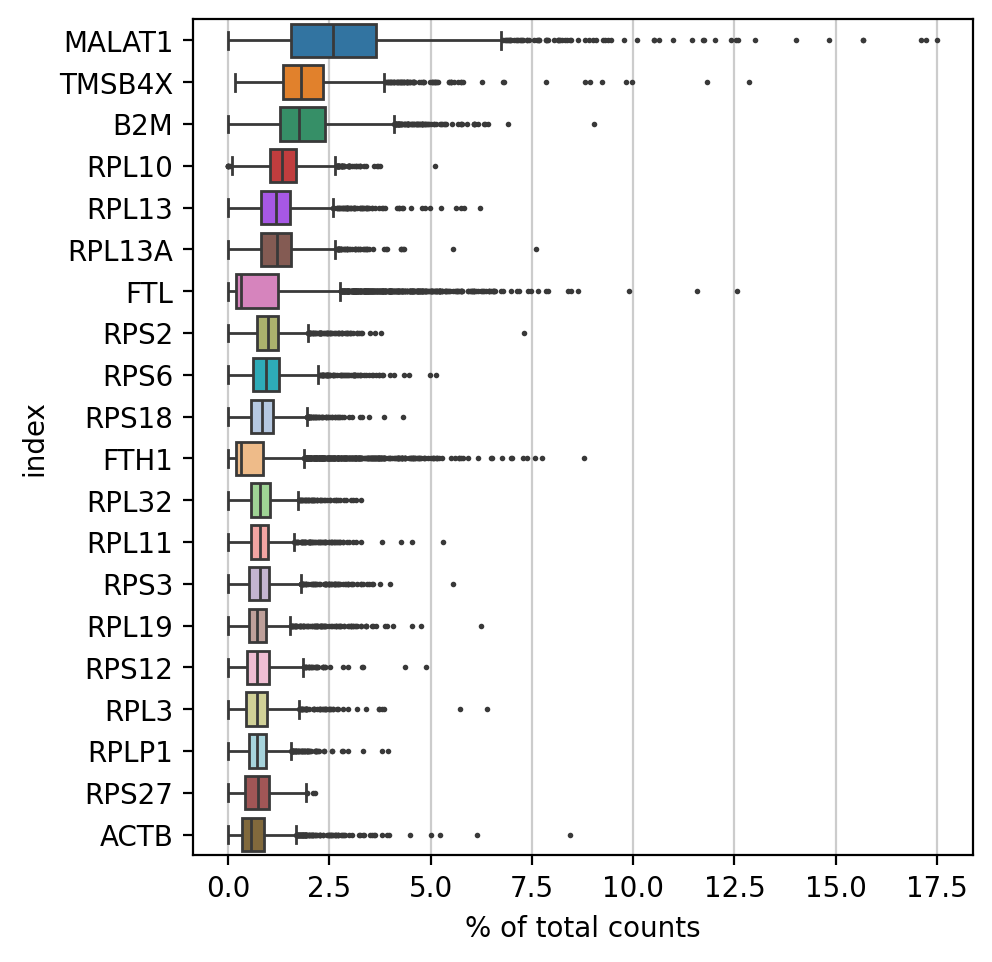

In [20]:
sc.pl.highest_expr_genes(adata, n_top=20)

High Expression Genes: Genes like MALAT1, TMSB4X, and B2M have relatively high percentages of total counts in some cells, indicating these genes are highly expressed in those cells.
Wide Distribution: The width of the violin plot at various points indicates the density of cells with those percentages. For instance, MALAT1 has a wider plot at higher percentages, showing that a significant number of cells have high expression of this gene.
Outliers: The dots outside the whiskers indicate outlier cells with unusually high expression of certain genes. These could represent biological variability or technical artifacts.

In [21]:
adata_n= adata.copy()
sc.pp.calculate_qc_metrics(adata_n, percent_top=None, log1p=False, inplace=True)

In [22]:
adata_n

AnnData object with n_obs × n_vars = 2700 × 32738
    obs: 'n_genes_by_counts', 'total_counts'
    var: 'gene_ids', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [23]:
adata_n.var

gene_ids  n_cells_by_counts  mean_counts  \
index                                                           
MIR1302-10    ENSG00000243485                  0          0.0   
FAM138A       ENSG00000237613                  0          0.0   
OR4F5         ENSG00000186092                  0          0.0   
RP11-34P13.7  ENSG00000238009                  0          0.0   
RP11-34P13.8  ENSG00000239945                  0          0.0   
...                       ...                ...          ...   
AC145205.1    ENSG00000215635                  0          0.0   
BAGE5         ENSG00000268590                  0          0.0   
CU459201.1    ENSG00000251180                  0          0.0   
AC002321.2    ENSG00000215616                  0          0.0   
AC002321.1    ENSG00000215611                  0          0.0   

              pct_dropout_by_counts  total_counts  
index                                              
MIR1302-10                    100.0           0.0  
FAM138A                       100.0           0.0  
OR4F5                         100.0           0.0  
RP11-34P13.7                  100.0           0.0  
RP11-34P13.8                  100.0           0.0  
...                             ...           ...  
AC145205.1                    100.0           0.0  
BAGE5                         100.0           0.0  
CU459201.1                    100.0           0.0  
AC002321.2                    100.0           0.0  
AC002321.1                    100.0           0.0  

[32738 rows x 5 columns]

In [24]:
adata_n.obs

n_genes_by_counts  total_counts
index                                            
AAACATACAACCAC-1                781        2421.0
AAACATTGAGCTAC-1               1352        4903.0
AAACATTGATCAGC-1               1131        3149.0
AAACCGTGCTTCCG-1                960        2639.0
AAACCGTGTATGCG-1                522         981.0
...                             ...           ...
TTTCGAACTCTCAT-1               1155        3461.0
TTTCTACTGAGGCA-1               1227        3447.0
TTTCTACTTCCTCG-1                622        1684.0
TTTGCATGAGAGGC-1                454        1024.0
TTTGCATGCCTCAC-1                724        1985.0

[2700 rows x 2 columns]

In [25]:
adata_n.var_names

Index(['MIR1302-10', 'FAM138A', 'OR4F5', 'RP11-34P13.7', 'RP11-34P13.8',
       'AL627309.1', 'RP11-34P13.14', 'RP11-34P13.9', 'AP006222.2',
       'RP4-669L17.10',
       ...
       'KIR3DL2-1', 'AL590523.1', 'CT476828.1', 'PNRC2-1', 'SRSF10-1',
       'AC145205.1', 'BAGE5', 'CU459201.1', 'AC002321.2', 'AC002321.1'],
      dtype='object', name='index', length=32738)

### mitochondrial genes flagged with MT at the beginning

In [26]:
s=adata_n.var_names.str.startswith("MT")

In [27]:
c=0
d=0
for x in s:
  if x==True:
    c+=1
  else:
    d+=1
print(c)
print(d)

105
32633


In [28]:
adata_n.var['mt'] = adata_n.var_names.str.startswith('MT-')

In [29]:
sc.pp.calculate_qc_metrics(adata_n, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

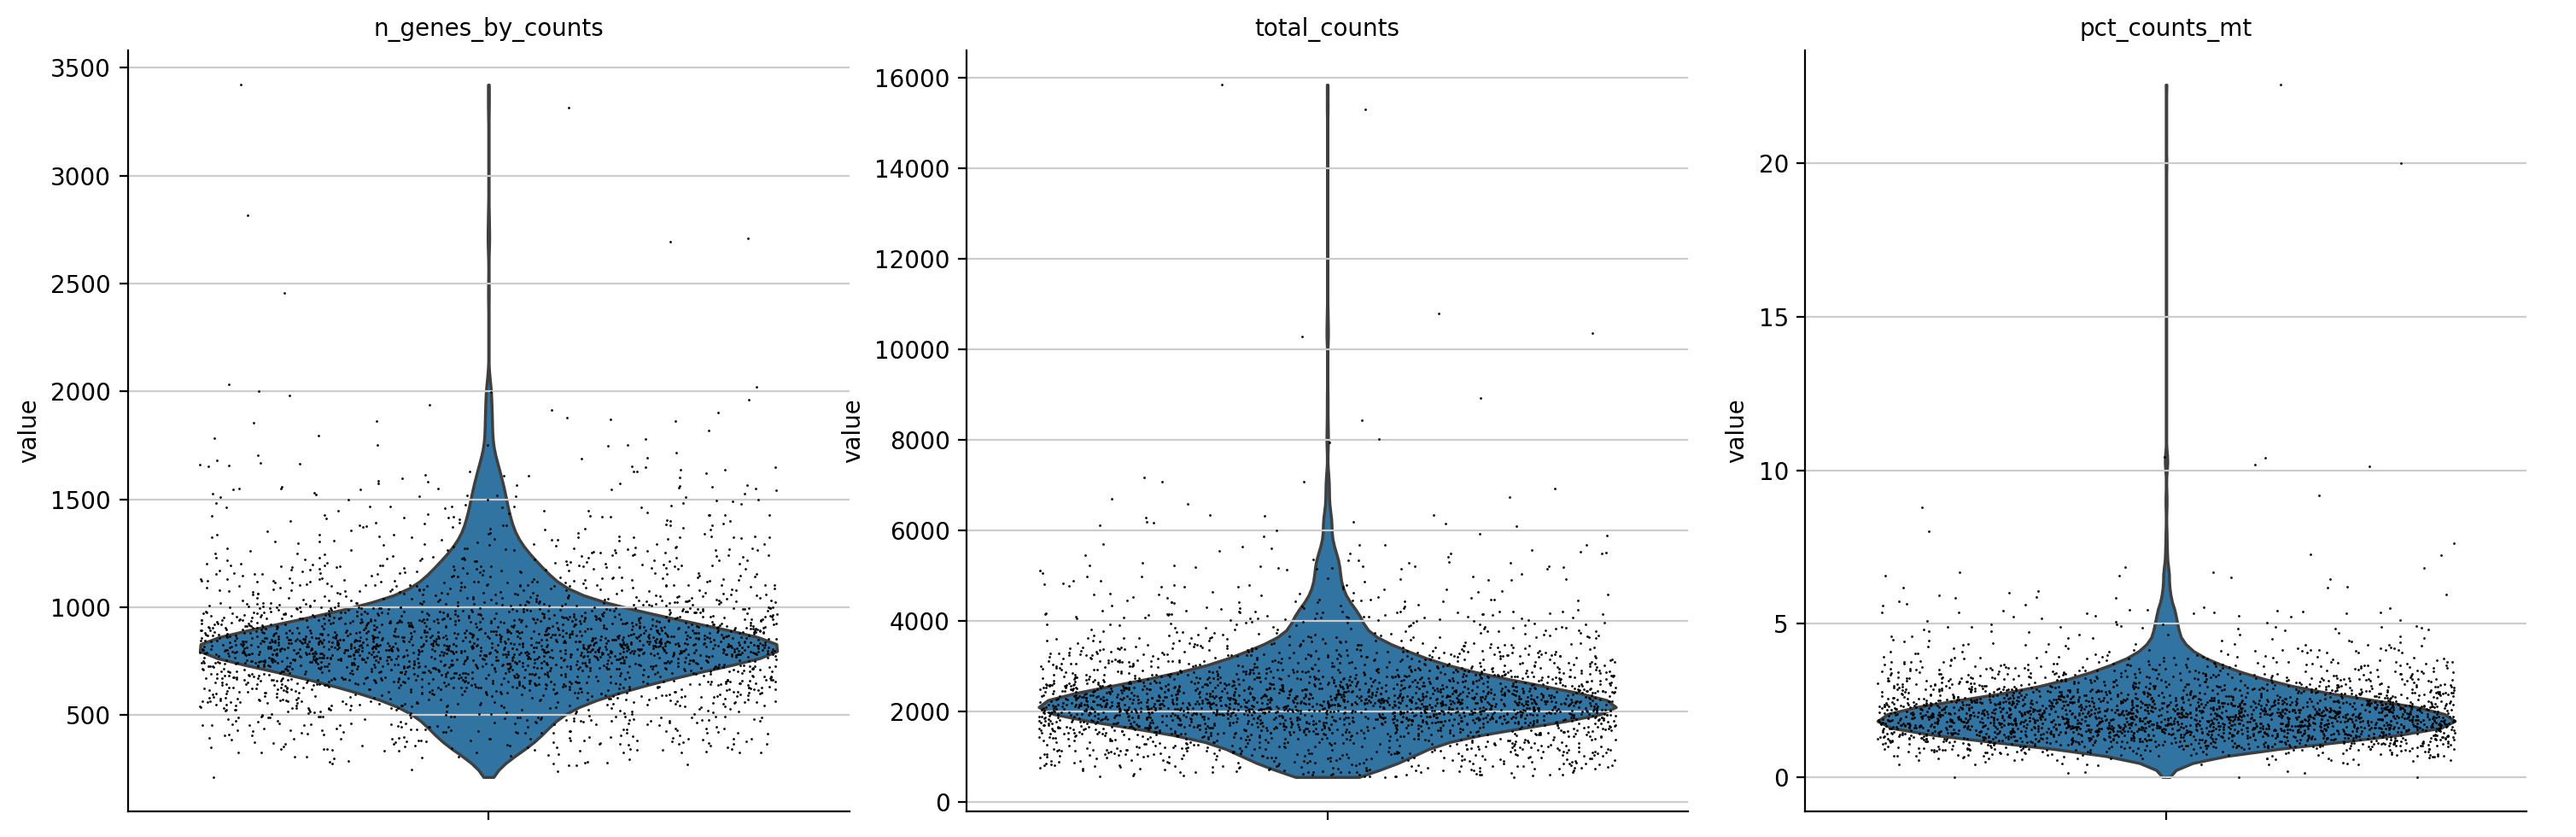

In [31]:
sc.pl.violin(adata_n, ['n_genes_by_counts',  'total_counts','pct_counts_mt'], jitter=0.4, multi_panel=True)


In [32]:
adata_n.var['mt']

index
MIR1302-10      False
FAM138A         False
OR4F5           False
RP11-34P13.7    False
RP11-34P13.8    False
                ...  
AC145205.1      False
BAGE5           False
CU459201.1      False
AC002321.2      False
AC002321.1      False
Name: mt, Length: 32738, dtype: bool

In [33]:
adata_n.obs

n_genes_by_counts  total_counts  total_counts_mt  \
index                                                                
AAACATACAACCAC-1                781        2421.0             73.0   
AAACATTGAGCTAC-1               1352        4903.0            186.0   
AAACATTGATCAGC-1               1131        3149.0             28.0   
AAACCGTGCTTCCG-1                960        2639.0             46.0   
AAACCGTGTATGCG-1                522         981.0             12.0   
...                             ...           ...              ...   
TTTCGAACTCTCAT-1               1155        3461.0             73.0   
TTTCTACTGAGGCA-1               1227        3447.0             32.0   
TTTCTACTTCCTCG-1                622        1684.0             37.0   
TTTGCATGAGAGGC-1                454        1024.0             21.0   
TTTGCATGCCTCAC-1                724        1985.0             16.0   

                  pct_counts_mt  
index                            
AAACATACAACCAC-1       3.015283  
AAACATTGAGCTAC-1       3.793596  
AAACATTGATCAGC-1       0.889171  
AAACCGTGCTTCCG-1       1.743085  
AAACCGTGTATGCG-1       1.223242  
...                         ...  
TTTCGAACTCTCAT-1       2.109217  
TTTCTACTGAGGCA-1       0.928343  
TTTCTACTTCCTCG-1       2.197150  
TTTGCATGAGAGGC-1       2.050781  
TTTGCATGCCTCAC-1       0.806045  

[2700 rows x 4 columns]

In [34]:
adata_n.var

gene_ids  n_cells_by_counts  mean_counts  \
index                                                           
MIR1302-10    ENSG00000243485                  0          0.0   
FAM138A       ENSG00000237613                  0          0.0   
OR4F5         ENSG00000186092                  0          0.0   
RP11-34P13.7  ENSG00000238009                  0          0.0   
RP11-34P13.8  ENSG00000239945                  0          0.0   
...                       ...                ...          ...   
AC145205.1    ENSG00000215635                  0          0.0   
BAGE5         ENSG00000268590                  0          0.0   
CU459201.1    ENSG00000251180                  0          0.0   
AC002321.2    ENSG00000215616                  0          0.0   
AC002321.1    ENSG00000215611                  0          0.0   

              pct_dropout_by_counts  total_counts     mt  
index                                                     
MIR1302-10                    100.0           0.0  False  
FAM138A                       100.0           0.0  False  
OR4F5                         100.0           0.0  False  
RP11-34P13.7                  100.0           0.0  False  
RP11-34P13.8                  100.0           0.0  False  
...                             ...           ...    ...  
AC145205.1                    100.0           0.0  False  
BAGE5                         100.0           0.0  False  
CU459201.1                    100.0           0.0  False  
AC002321.2                    100.0           0.0  False  
AC002321.1                    100.0           0.0  False  

[32738 rows x 6 columns]

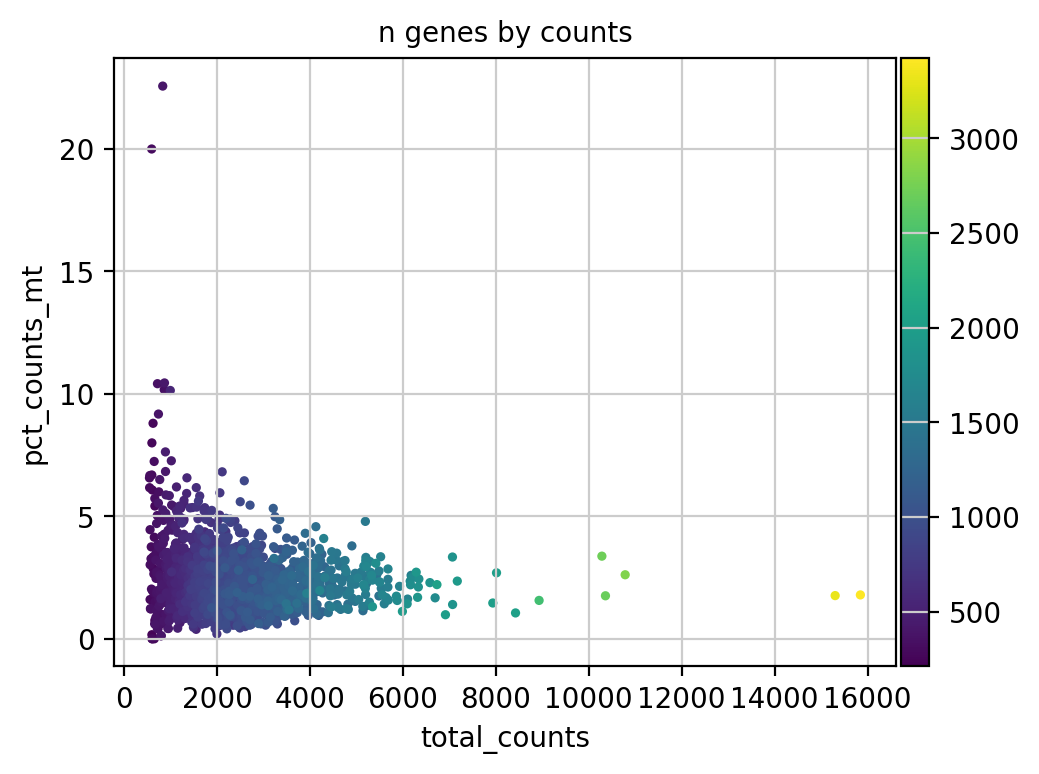

In [35]:
sc.pl.scatter(adata_n, x="total_counts", y="pct_counts_mt", color="n_genes_by_counts")

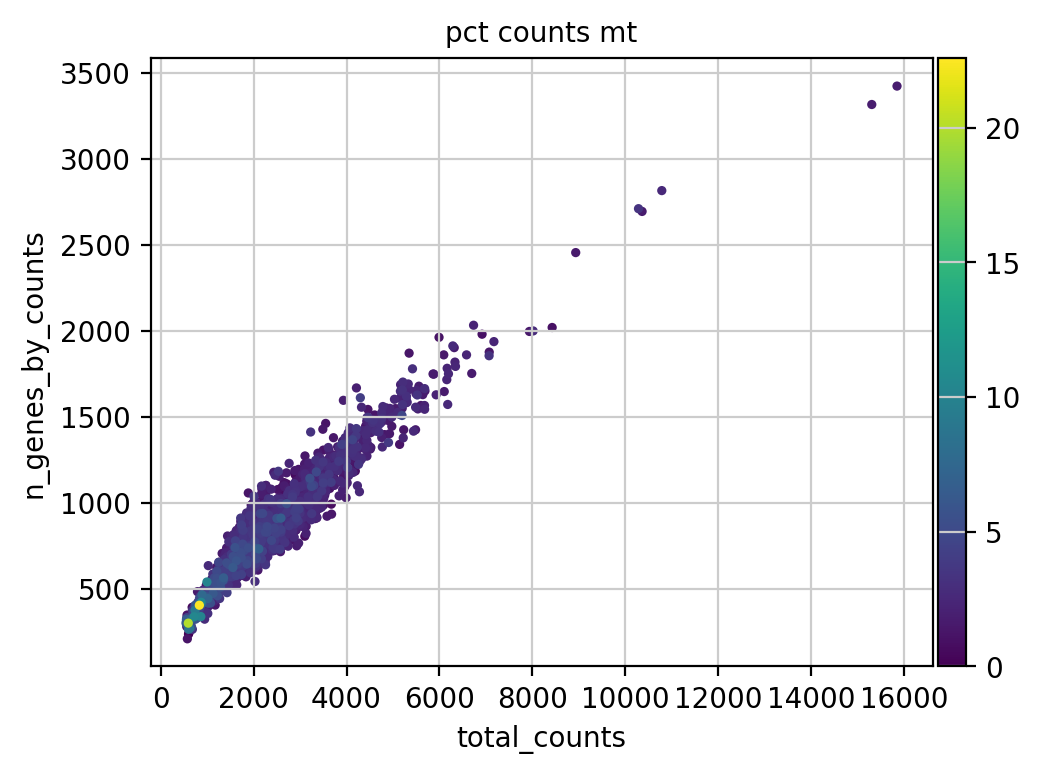

In [36]:
sc.pl.scatter(adata_n, x="total_counts", y="n_genes_by_counts", color="pct_counts_mt")

### Filtering
- cells <200 genes and higher mt genes (>5%)
- cells with <5% mt genes but higher genes expressed (doublets)
- genes expressed less

In [37]:
adata_fil= adata_n.copy()
adata_fil

AnnData object with n_obs × n_vars = 2700 × 32738
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mt'

In [38]:
sc.pp.filter_cells(adata_fil, min_genes=200)

In [39]:
adata_fil

AnnData object with n_obs × n_vars = 2700 × 32738
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'gene_ids', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mt'

In [40]:
adata_fil = adata_fil[adata_fil.obs.pct_counts_mt<5,:]
print(adata_fil)

View of AnnData object with n_obs × n_vars = 2643 × 32738
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'gene_ids', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mt'


In [45]:
adata_fil= adata_fil[adata_fil.obs.total_counts<6000, :]

In [46]:
adata_fil = adata_fil[adata_fil.obs.n_genes_by_counts<2500, :]
adata_fil

View of AnnData object with n_obs × n_vars = 2617 × 13656
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'gene_ids', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mt', 'n_cells'

Filter out genes expressed in less than 3 cells

In [47]:
sc.pp.filter_genes(adata_fil, min_cells=3)
adata_fil

/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_simple.py:275: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var["n_cells"] = number


AnnData object with n_obs × n_vars = 2617 × 13586
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'gene_ids', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mt', 'n_cells'

19082 genes were expressed only in 1-2 cells!

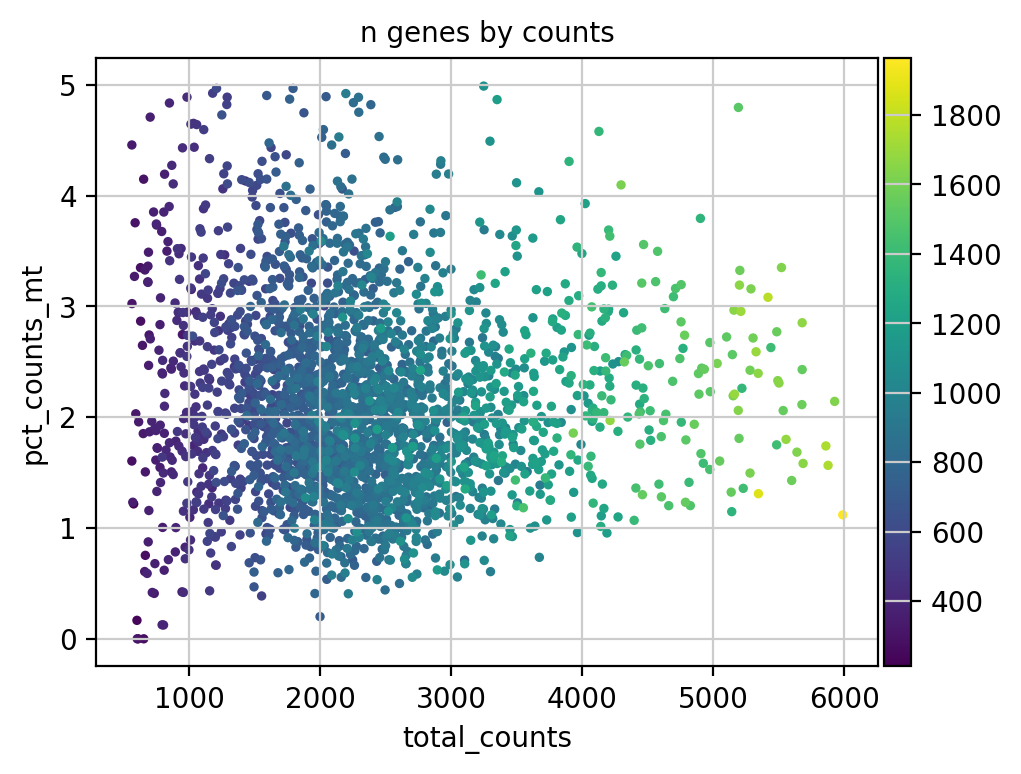

In [48]:
sc.pl.scatter(adata_fil, x='total_counts', y='pct_counts_mt', color='n_genes_by_counts')

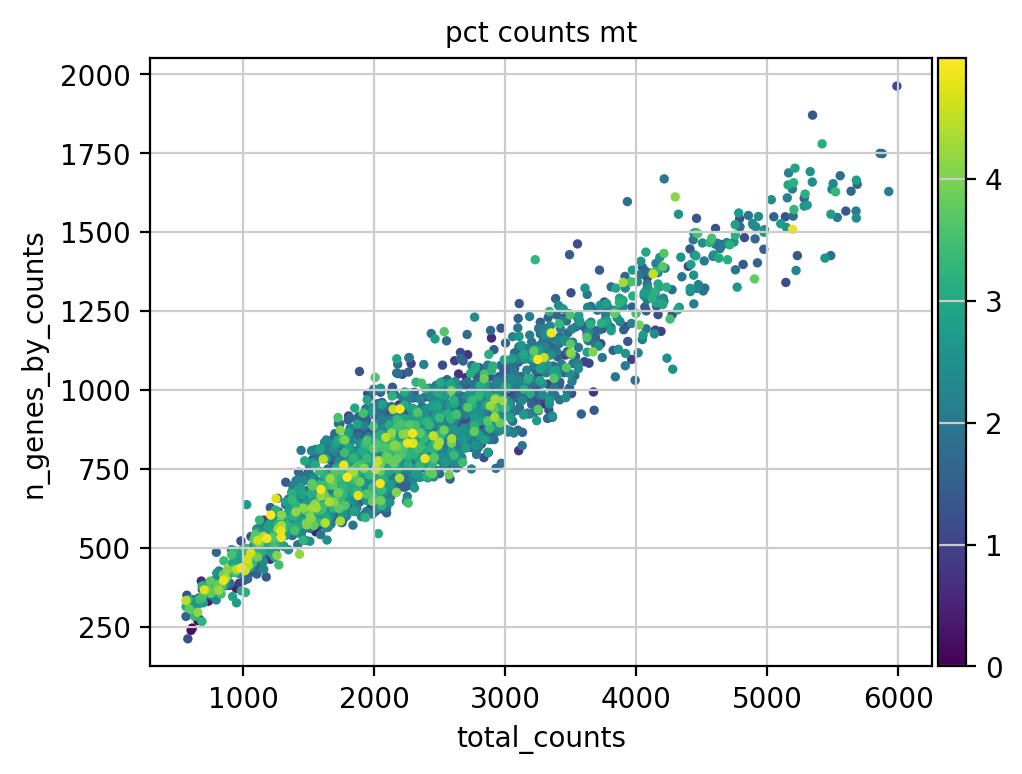

In [49]:
sc.pl.scatter(adata_fil, x='total_counts',y='n_genes_by_counts', color='pct_counts_mt')

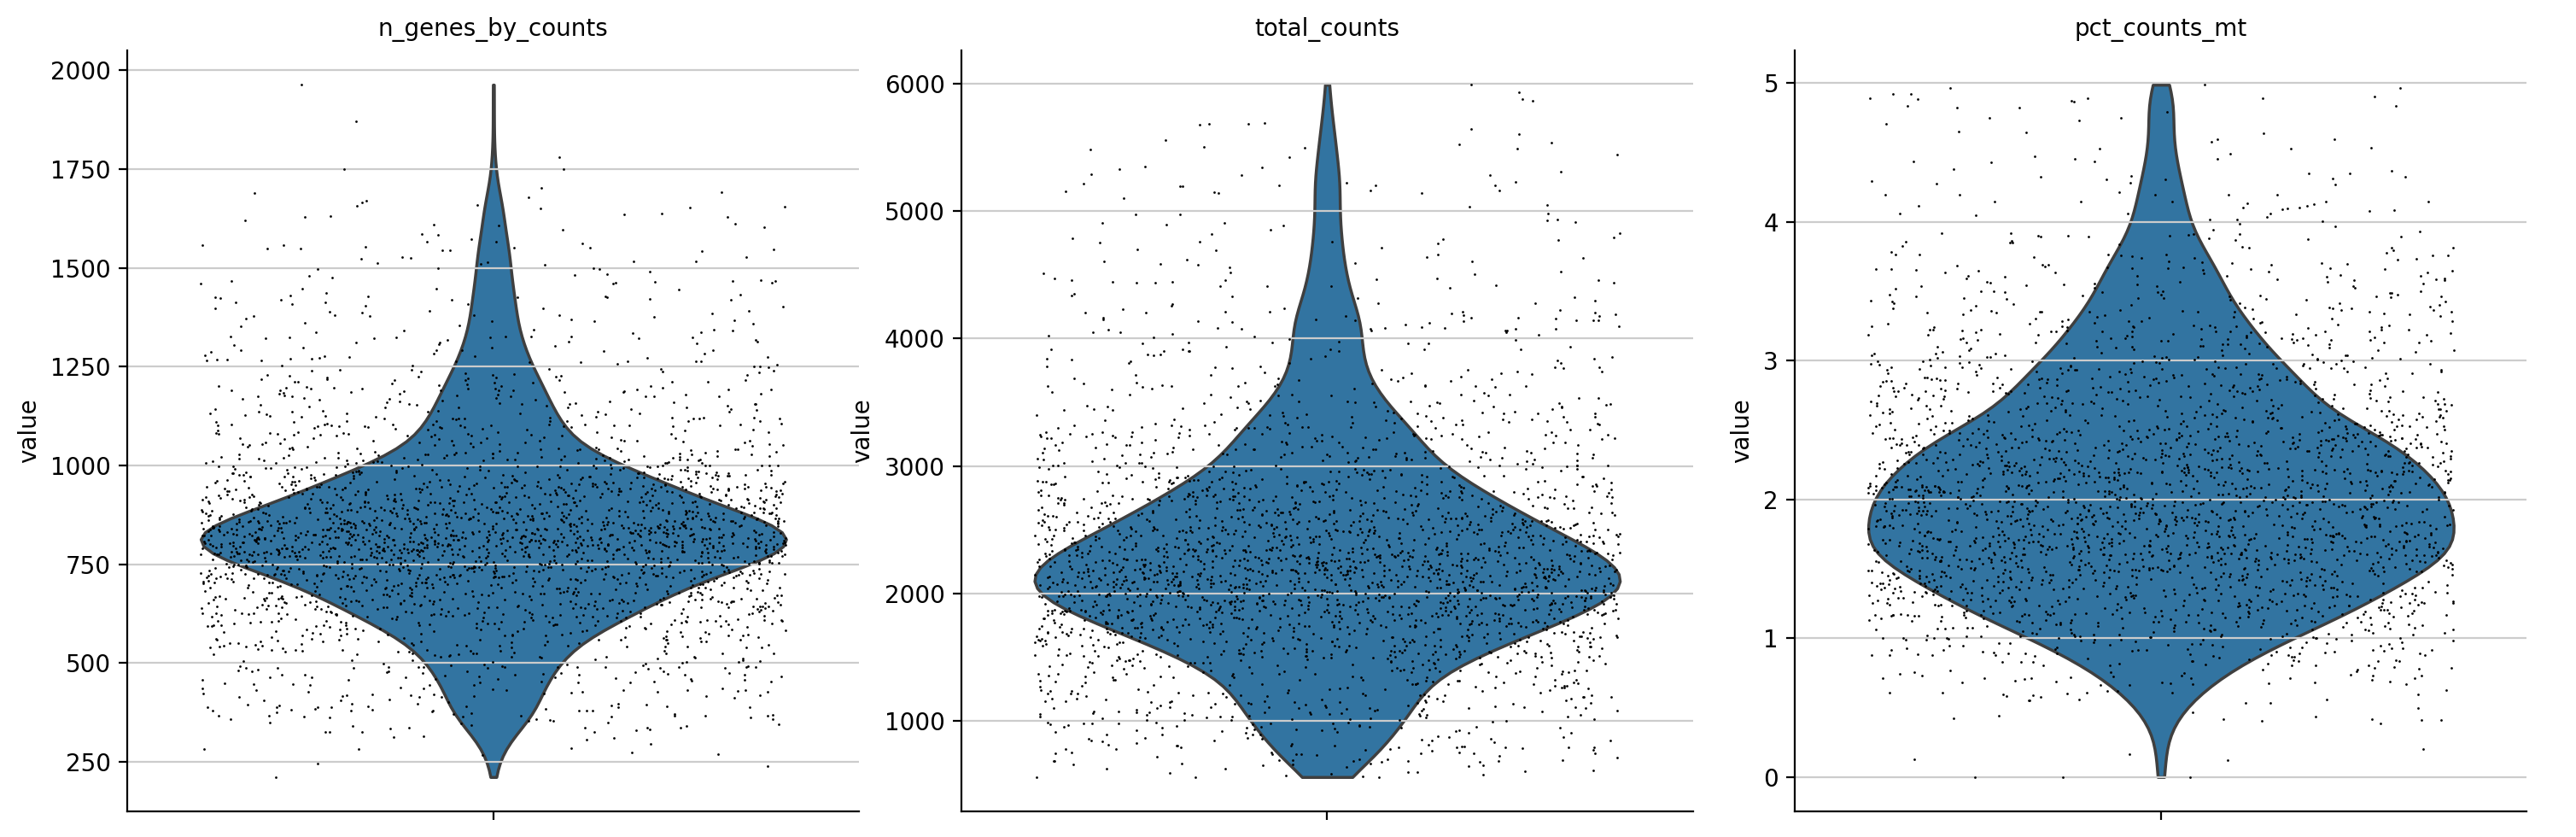

In [50]:
sc.pl.violin(adata_fil, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], jitter=0.4, multi_panel=True)

### Normalization

In [51]:
adata_norm= adata_fil.copy()
sc.pp.normalize_total(adata_norm, target_sum=1e4)
adata_norm

AnnData object with n_obs × n_vars = 2617 × 13586
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'gene_ids', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mt', 'n_cells'

### Log transformation to reduce skewness and make data more symmetric.

In [52]:
sc.pp.log1p(adata_norm)

In [53]:
adata_norm

AnnData object with n_obs × n_vars = 2617 × 13586
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'gene_ids', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mt', 'n_cells'
    uns: 'log1p'

### Highly Variable Genes = Subset of genes that show high cell to cell variation in expression levels.
Differentially Expressed Genes = Characterized by their significant changes in expression levels under different conditions

In [54]:
adata_hvg= adata_norm.copy()
sc.pp.highly_variable_genes(adata_hvg, min_mean=0.0125, max_mean=3, min_disp=0.5)

In [55]:
adata_hvg

AnnData object with n_obs × n_vars = 2617 × 13586
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'gene_ids', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mt', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'

In [57]:
adata_hvg.var['highly_variable']

index
AL627309.1       False
AP006222.2       False
RP11-206L10.2    False
RP11-206L10.9    False
LINC00115        False
                 ...  
AC145212.1       False
AL592183.1       False
AL354822.1       False
PNRC2-1          False
SRSF10-1         False
Name: highly_variable, Length: 13586, dtype: bool

In [58]:
adata_hvg.var['means']

index
AL627309.1       0.013664
AP006222.2       0.004734
RP11-206L10.2    0.004689
RP11-206L10.9    0.002665
LINC00115        0.027656
                   ...   
AC145212.1       0.027663
AL592183.1       0.486160
AL354822.1       0.012258
PNRC2-1          0.159080
SRSF10-1         0.098366
Name: means, Length: 13586, dtype: float64

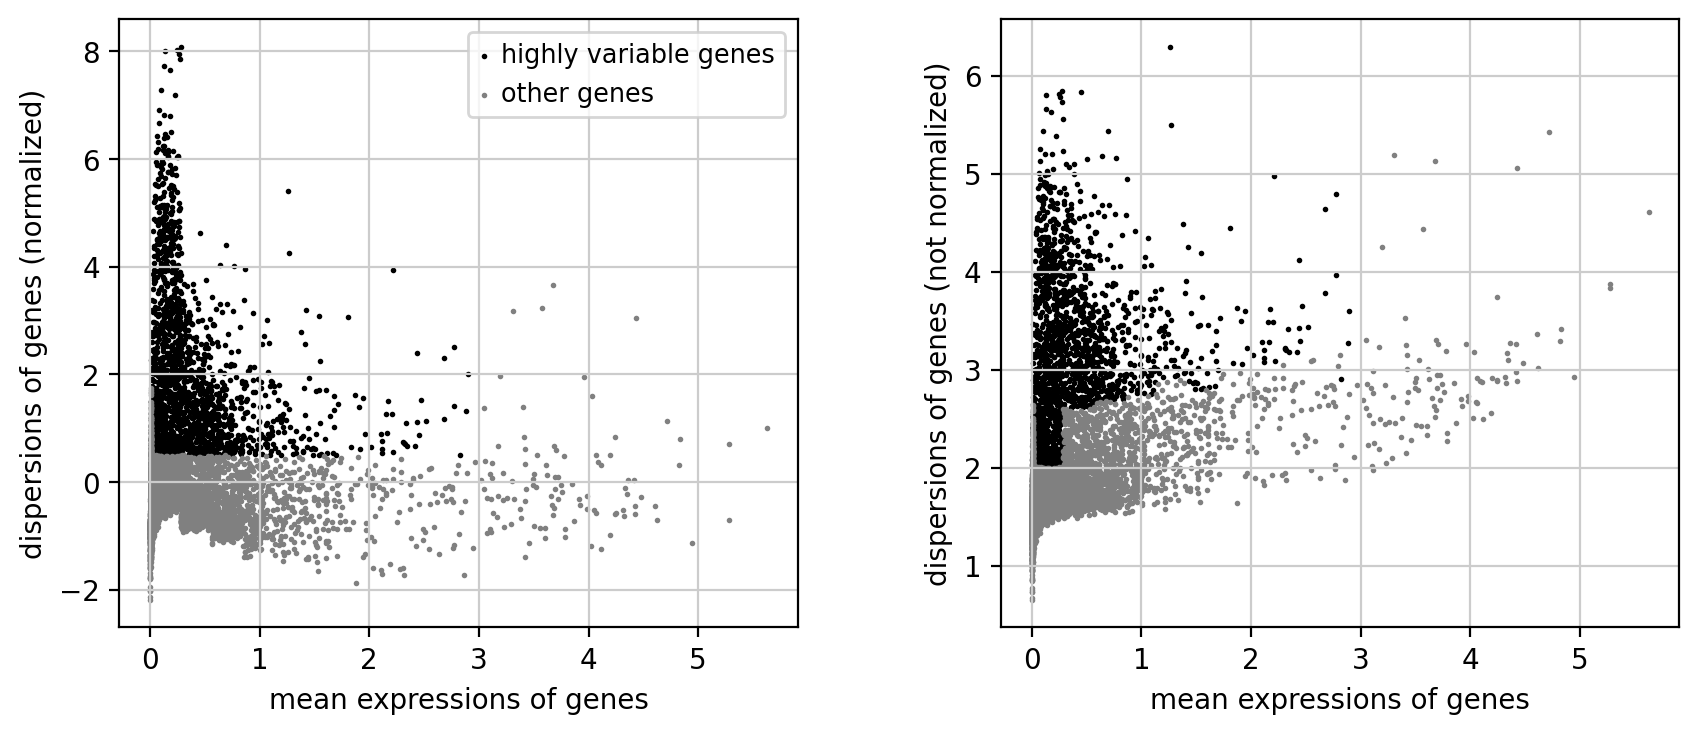

In [60]:
sc.pl.highly_variable_genes(adata_hvg)

In [61]:
adata_hvg= adata_hvg[:, adata_hvg.var.highly_variable]

In [62]:
adata_hvg

View of AnnData object with n_obs × n_vars = 2617 × 1825
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'gene_ids', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mt', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'

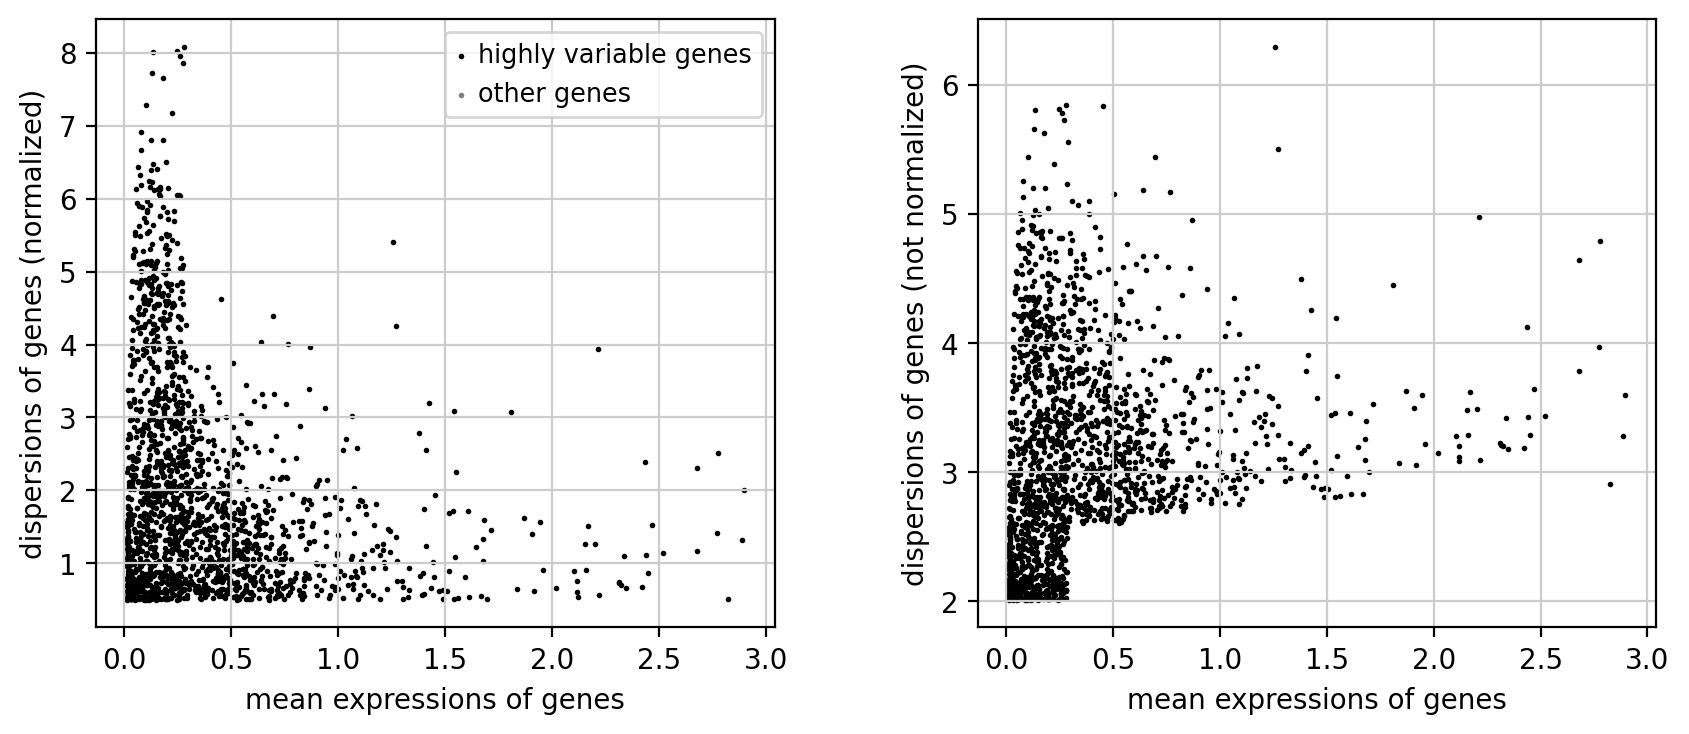

In [63]:
sc.pl.highly_variable_genes(adata_hvg)

### Preparing for PCA on the HVG data

In [64]:
pc_hvg= adata_hvg.copy()

In [65]:
sc.pp.scale(pc_hvg, max_value=10)

In [66]:
pc_hvg

AnnData object with n_obs × n_vars = 2617 × 1825
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'gene_ids', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mt', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg'

In [67]:
pc_hvg.var['mean']

index
TNFRSF4    0.103681
CPSF3L     0.126229
ATAD3C     0.005986
C1orf86    0.317167
RER1       0.386433
             ...   
ICOSLG     0.024259
SUMO3      0.361059
SLC19A1    0.016560
S100B      0.073066
PRMT2      0.387095
Name: mean, Length: 1825, dtype: float64

### PCA

In [68]:
sc.tl.pca(pc_hvg)

In [69]:
pc_hvg

AnnData object with n_obs × n_vars = 2617 × 1825
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'gene_ids', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mt', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

In [70]:
pc_hvg.varm['PCs']

array([[-0.02130848,  0.00996568,  0.00532252, ...,  0.03660006,
         0.02121719,  0.03369845],
       [-0.00438235,  0.01144892, -0.00372723, ...,  0.00888438,
         0.00771712,  0.0153213 ],
       [-0.00270758,  0.00370333,  0.00055102, ..., -0.00843331,
         0.00286671,  0.01404716],
       ...,
       [ 0.01056519, -0.00028239, -0.00485262, ...,  0.00806169,
        -0.00200579, -0.00047675],
       [-0.01043144,  0.04584564, -0.00324972, ..., -0.03528352,
        -0.01345912,  0.0246531 ],
       [-0.01054562,  0.04137755,  0.00611956, ...,  0.02842147,
        -0.01535115, -0.02204122]])

In [71]:
pc_hvg.obsm['X_pca']

array([[-4.3182774 ,  0.4176085 ,  0.1727117 , ...,  0.5412047 ,
        -2.268126  , -1.1402942 ],
       [-0.52788687, -5.0996227 , -4.0506563 , ..., -2.9785893 ,
        -0.4543263 , -3.7022057 ],
       [-2.0392632 ,  2.3948677 ,  0.7885544 , ..., -3.5636835 ,
         0.14741147,  0.32961366],
       ...,
       [-2.5911257 , -7.5503025 , -2.898963  , ...,  1.0490125 ,
         0.4297295 ,  0.13548039],
       [-2.865473  , -6.3568635 , -2.4508924 , ...,  1.3334838 ,
        -3.8909206 ,  0.5390323 ],
       [-2.416942  , -1.0297992 ,  0.93062884, ...,  0.16434285,
        -1.5268333 ,  2.2414622 ]], dtype=float32)

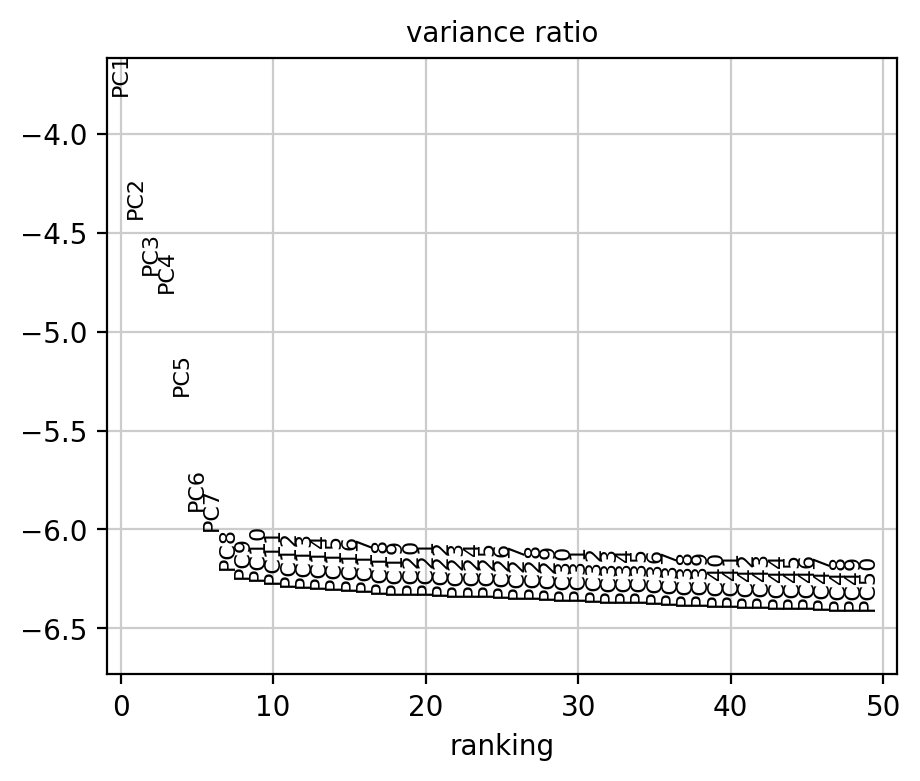

In [72]:
sc.pl.pca_variance_ratio(pc_hvg, log=True, n_pcs=50)

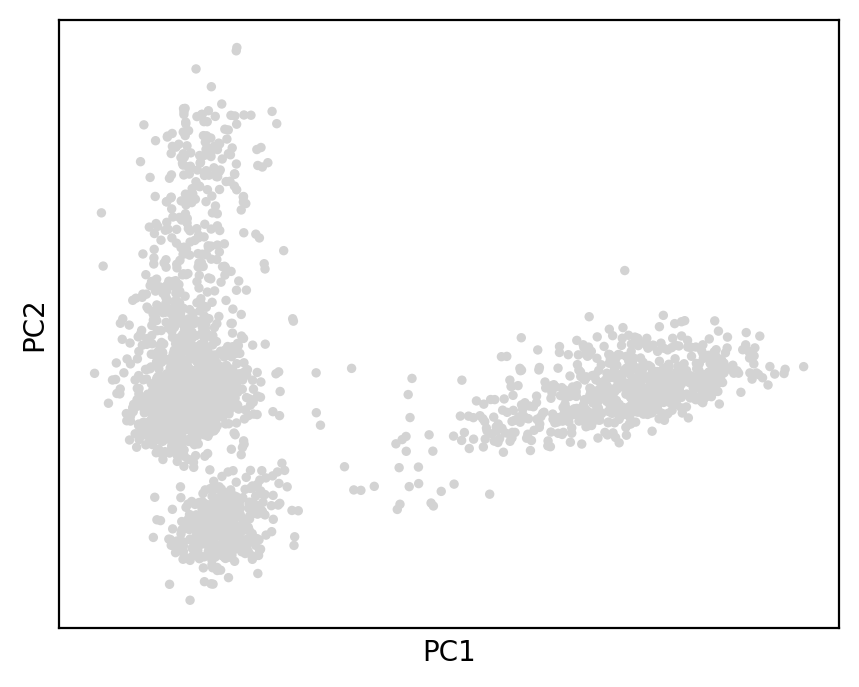

In [74]:
sc.pl.pca_scatter(pc_hvg)

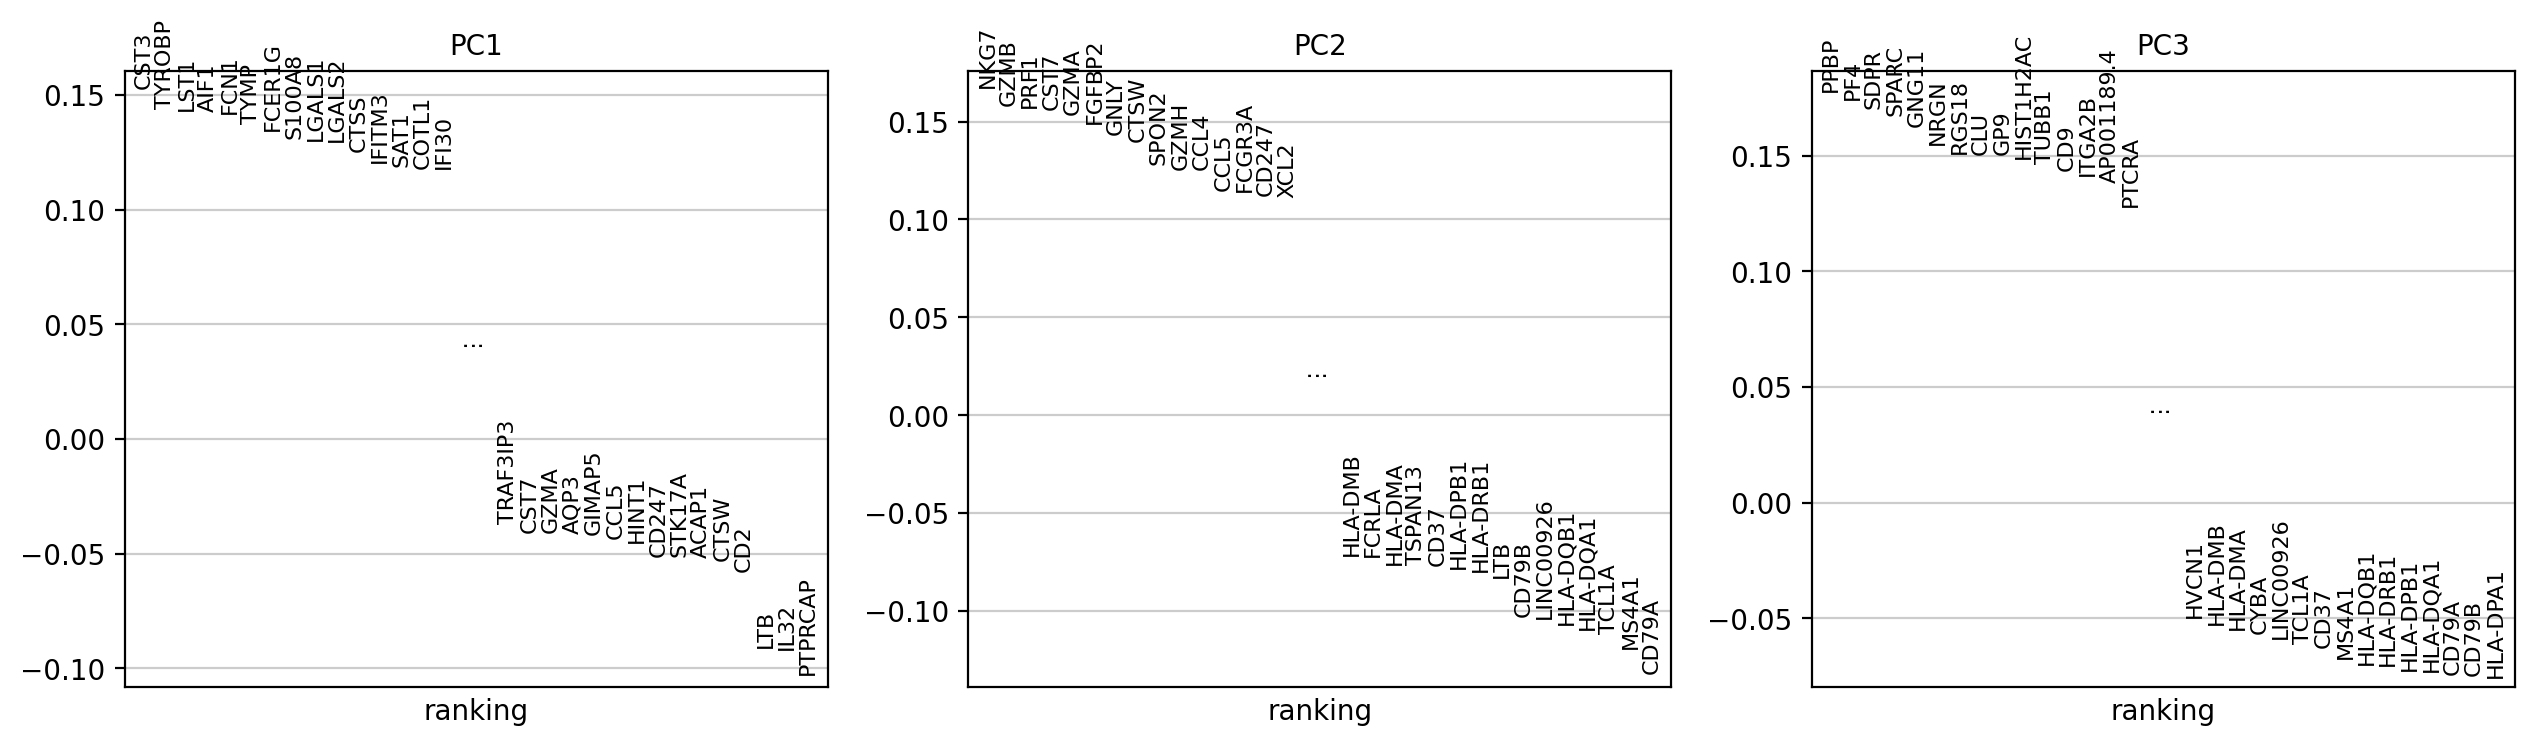

In [75]:
sc.pl.pca_loadings(pc_hvg)

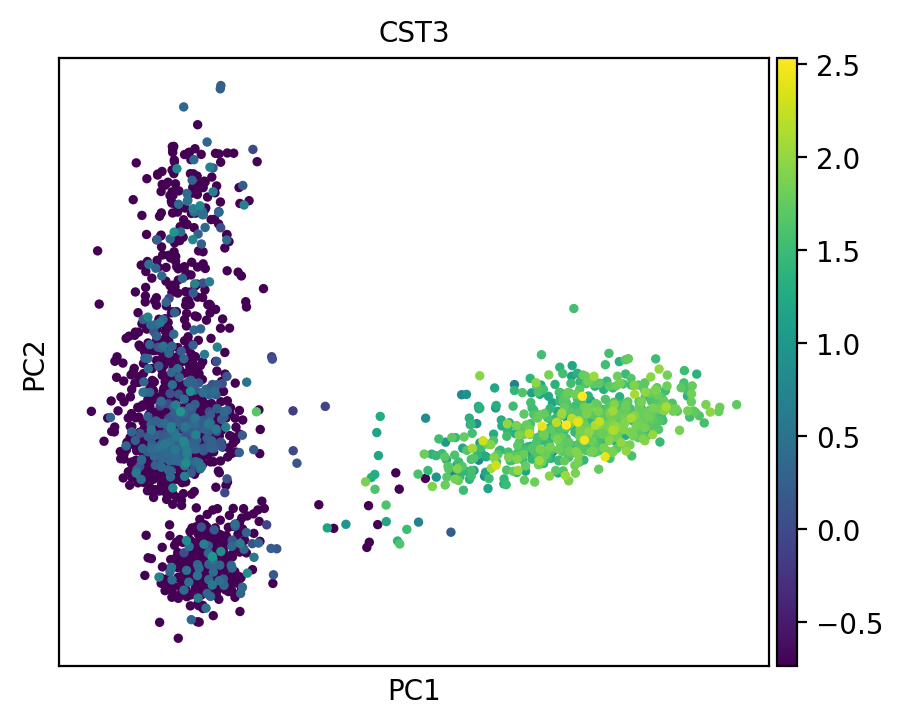

In [76]:
sc.pl.pca(pc_hvg, color='CST3')

### finding neighbors

In [77]:
sc.pp.neighbors(pc_hvg, n_pcs=15)

In [78]:
pc_hvg

AnnData object with n_obs × n_vars = 2617 × 1825
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'gene_ids', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mt', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors'
    obsm: 'X_pca'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [79]:
for key, value in pc_hvg.obsp.items():
  print("key: ", key)
  print("value: ", value)

key:  distances
value:    (0, 299)	4.292467110562837
  (0, 468)	4.30244689341192
  (0, 512)	4.693032826823979
  (0, 1206)	4.90187801261283
  (0, 400)	4.907552947012836
  (0, 1545)	4.985537593707082
  (0, 2131)	5.081445541466873
  (0, 954)	5.084084168728602
  (0, 1755)	5.119827824022194
  (0, 1965)	5.1896196194358595
  (0, 1334)	5.2258842267637435
  (0, 17)	5.252391815306065
  (0, 578)	5.257351950076915
  (0, 784)	5.259736070574691
  (1, 2327)	5.30533952034622
  (1, 922)	5.662568835920072
  (1, 163)	5.861319664272467
  (1, 990)	5.912200352372355
  (1, 1045)	6.334874149749469
  (1, 1796)	6.553505974038462
  (1, 852)	6.623370564008466
  (1, 345)	6.696150559240116
  (1, 2540)	6.696652717835308
  (1, 10)	6.766539196949754
  (1, 2573)	6.916478656220456
  :	:
  (2615, 1196)	4.466642296188448
  (2615, 2156)	4.498075709579745
  (2615, 1210)	4.582287663328459
  (2615, 1446)	4.599102198019961
  (2615, 1934)	4.634487421854771
  (2615, 1602)	4.763896090715536
  (2615, 179)	4.8054242321340634
  (261

In [80]:
X_pca= pc_hvg.obsm['X_pca']

### K-Means + UMAP

In [87]:
umap_km= pc_hvg.copy()

In [88]:
sc.tl.umap(umap_km)

In [89]:
umap_km

AnnData object with n_obs × n_vars = 2617 × 1825
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes', 'kmeans15'
    var: 'gene_ids', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mt', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [81]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [90]:
kmeans= KMeans(n_clusters=15, random_state=0)
kmeans.fit(X_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=15, random_state=0)

In [91]:
umap_km.obs['kmeans15'] = kmeans.labels_.astype(str)


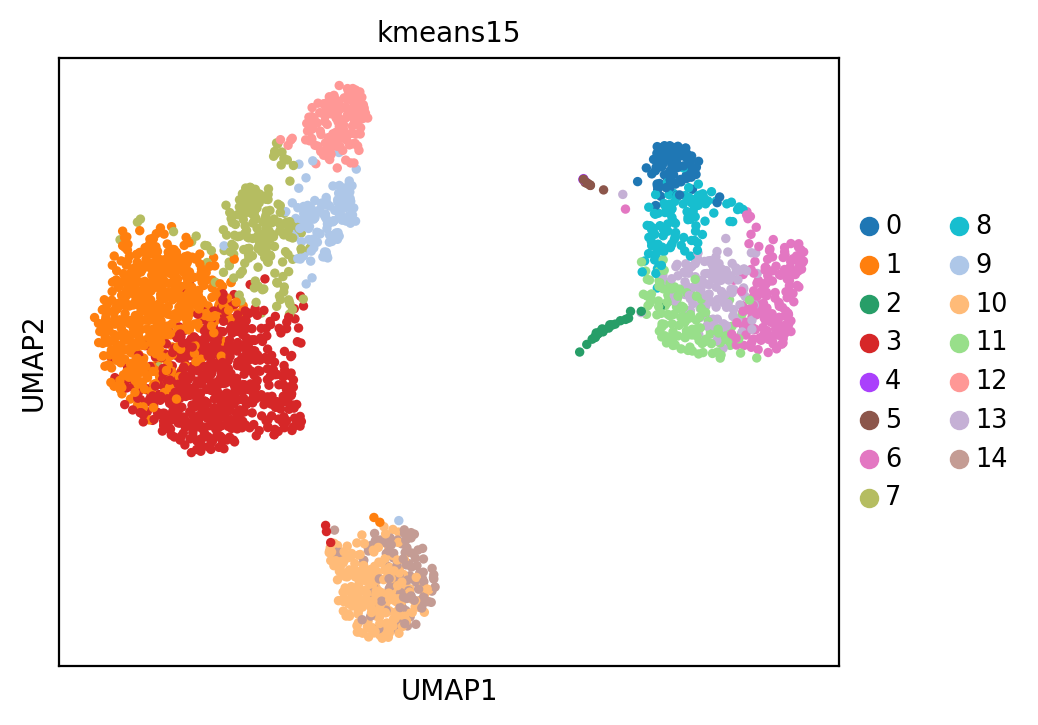

In [93]:
sc.pl.umap(umap_km, color='kmeans15')

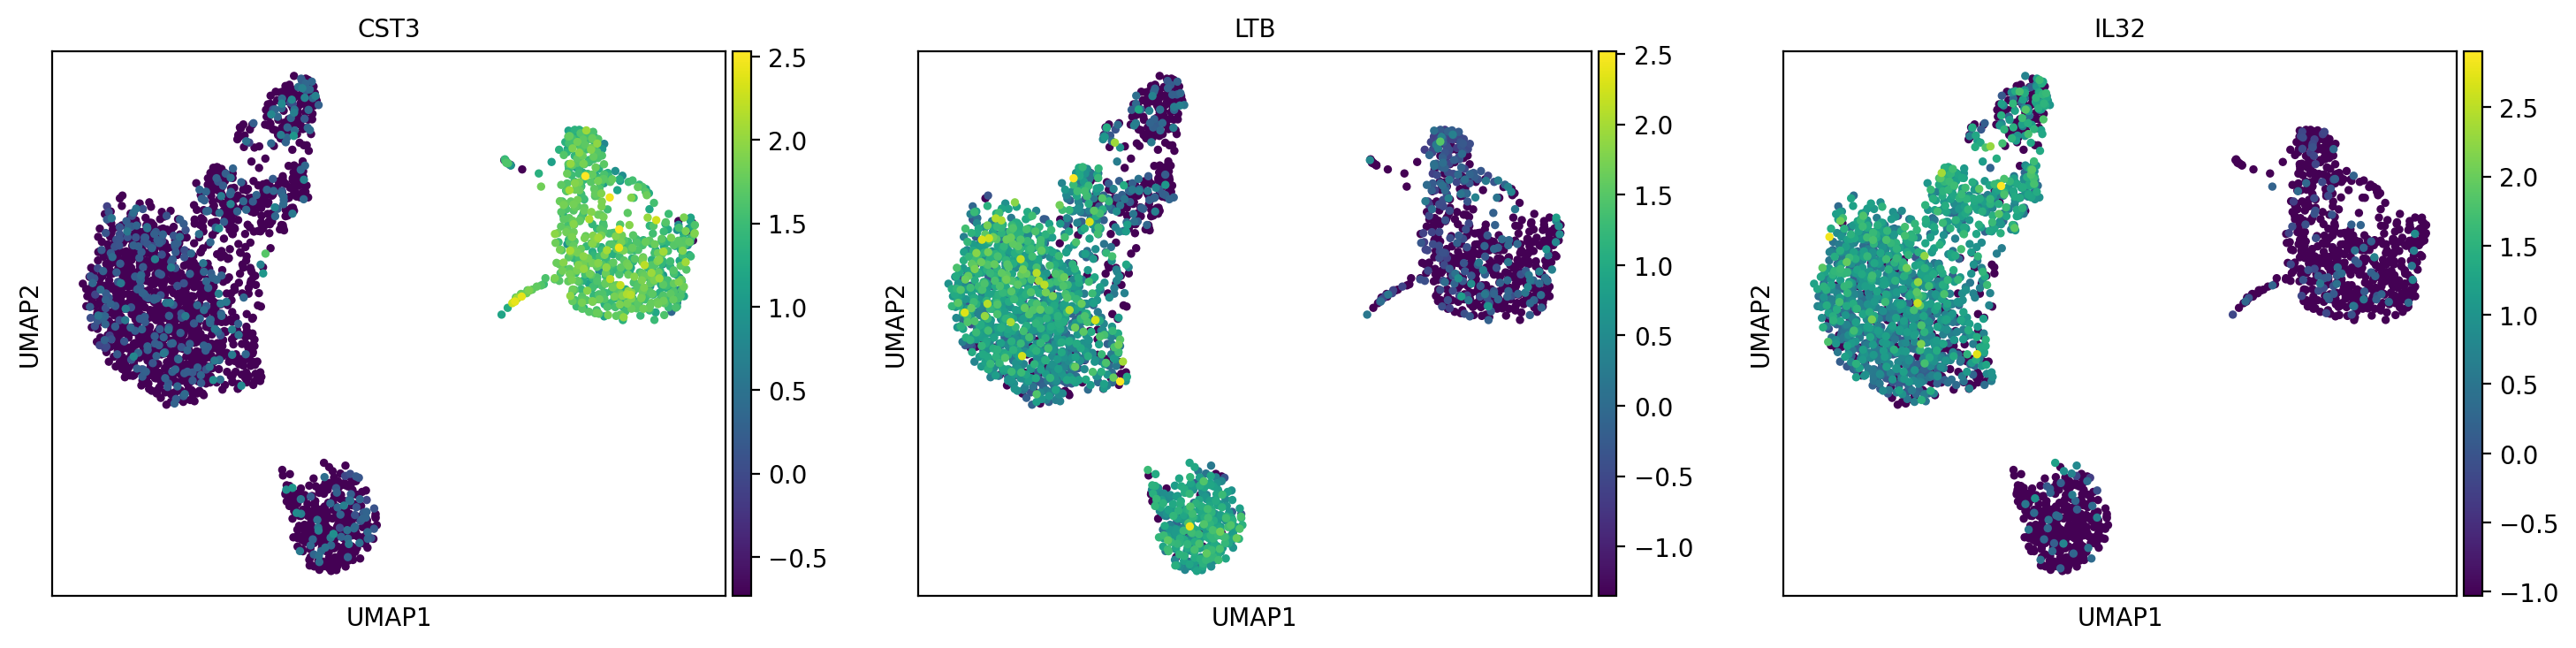

In [95]:
sc.pl.umap(umap_km, color=['CST3', 'LTB', 'IL32'])